In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.mixture import GaussianMixture         
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"H:\Machine_Lerning_AM\Data\Country-data.csv")
df=pd.DataFrame(data)

In [3]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


                                                         Data Preparation

                                                         

In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
df=pd.DataFrame(data)
df2_dropped=df.drop("country" ,axis=1)

df2_dropped.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

                                                      VISUALIZATION 

In [8]:
df2_dropped.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
#GDP per capita ( "gdpp") is an economic metric that divides the Gross Domestic Product (GDP) of a country by its population. It represents the average economic output per person and is often used as an indicator of the standard of living and economic prosperity within a country.

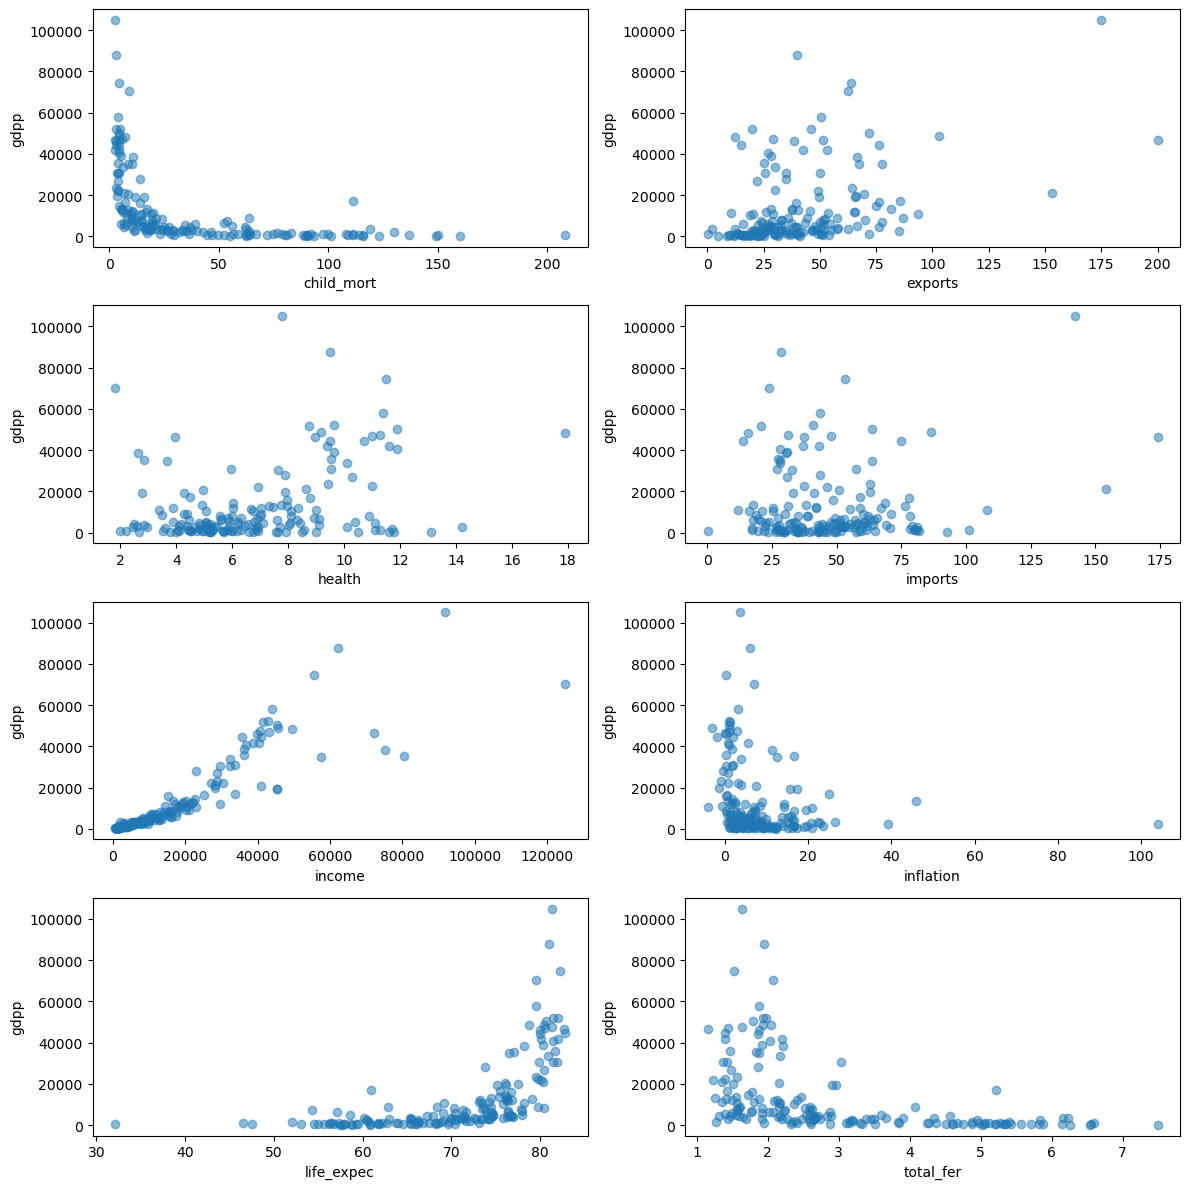

In [10]:

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4,2, figsize=(12, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate over each column (excluding 'gdpp')
for i, column in enumerate(df2_dropped.columns[df2_dropped.columns != 'gdpp']):
    # Plot the 'gdpp' column against the current column
    axs[i].scatter(df2_dropped[column], df2_dropped['gdpp'], alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('gdpp')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

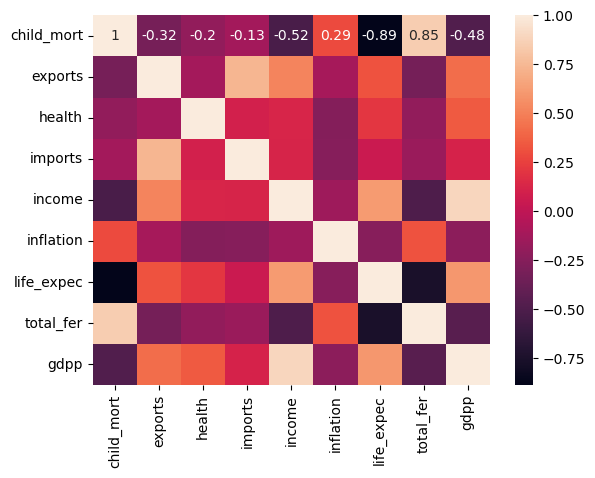

In [11]:
# Calculate correlation matrix

import seaborn as sns
correlation_matrix = df2_dropped.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True)  # Annotate with correlation values
plt.show()

In [12]:
correlation_matrix=pd.DataFrame(correlation_matrix)
correlation_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [13]:

                                       #To find which pairs have the most correlation with each other?

# Set the diagonal to 0 to exclude self-correlation
np.fill_diagonal(correlation_matrix.values, 0)

# Find the index of the maximum correlation value
most_correlated = np.unravel_index(np.argmax(correlation_matrix.values, axis=None), correlation_matrix.shape)

# Extract the feature names
feature1 = correlation_matrix.columns[most_correlated[0]]
feature2 = correlation_matrix.columns[most_correlated[1]]

# Get the actual correlation value
correlation_value = correlation_matrix.loc[feature1, feature2]

print(f"The most positively or negatively correlated features are '{feature1}' and '{feature2}' with a correlation of {correlation_value:.2f}")

The most positively or negatively correlated features are 'income' and 'gdpp' with a correlation of 0.90


                                                         plotting world map 


 step1: checking the country names in the dataset with map data:

In [14]:
import geopandas as gpd                                                    

# List of country names in the world map data
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Countries_df=[]
world_countries = world['name'].tolist()

# List of country names in our dataset
dataset_countries = df['country'].tolist()

# Find country names in your dataset that are not in the world map data
mismatched_countries = [country for country in dataset_countries if country not in world_countries]

print("Mismatched country names:", mismatched_countries)
print("world_countries country names on map :", world_countries)
print("world_countries country names on dataset :", dataset_countries)



Mismatched country names: ['Antigua and Barbuda', 'Bahrain', 'Barbados', 'Bosnia and Herzegovina', 'Cape Verde', 'Central African Republic', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Czech Republic', 'Dominican Republic', 'Equatorial Guinea', 'Grenada', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Macedonia, FYR', 'Maldives', 'Malta', 'Mauritius', 'Micronesia, Fed. Sts.', 'Samoa', 'Seychelles', 'Singapore', 'Slovak Republic', 'Solomon Islands', 'St. Vincent and the Grenadines', 'Tonga', 'United States']
world_countries country names on map : ['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States of America', 'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama'

Step2: Adjust Country Names 

In [15]:

#Step2: Adjust Country Names 
name_mapping = {'Bosnia and Herzegovina': 'Bosnia and Herz',
                'Russian Federation':  'Russia',
   'Central African Republic': 'Central African Rep.',
  'Congo':'Congo',
         "Cote d'Ivoire":       "Côte d'Ivoire",
            'Czech Republic':  'Czechia',
                'Dominican Republic': 'Dem. Rep. Congo',
               'Kyrgyz Republic':'Kyrgyzstan',
                'Lao':'Lao',
                'Macedonia':'North Macedonia',
                
              'United States':'United States of America'
}
    
 
df['country'] = df['country'].replace(name_mapping)
#checking

# Find the row where the country name is 'United States'
usa_row = df[df['country'] == 'Mexico']

print(usa_row)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


In [17]:
# Remained Countries=['Barbados', 'Bahrain', 'Antigua and Barbuda','Equatorial Guinea','Comoros','Cape Verde','Grenada','Malta', 'Maldives', 'FYR', 'Mauritius', 'Micronesia, Fed. Sts.', 'Samoa', 'Seychelles', 'Singapore', 'Slovak Republic', 'Solomon Islands', 'St. Vincent and the Grenadines', 'Tonga']

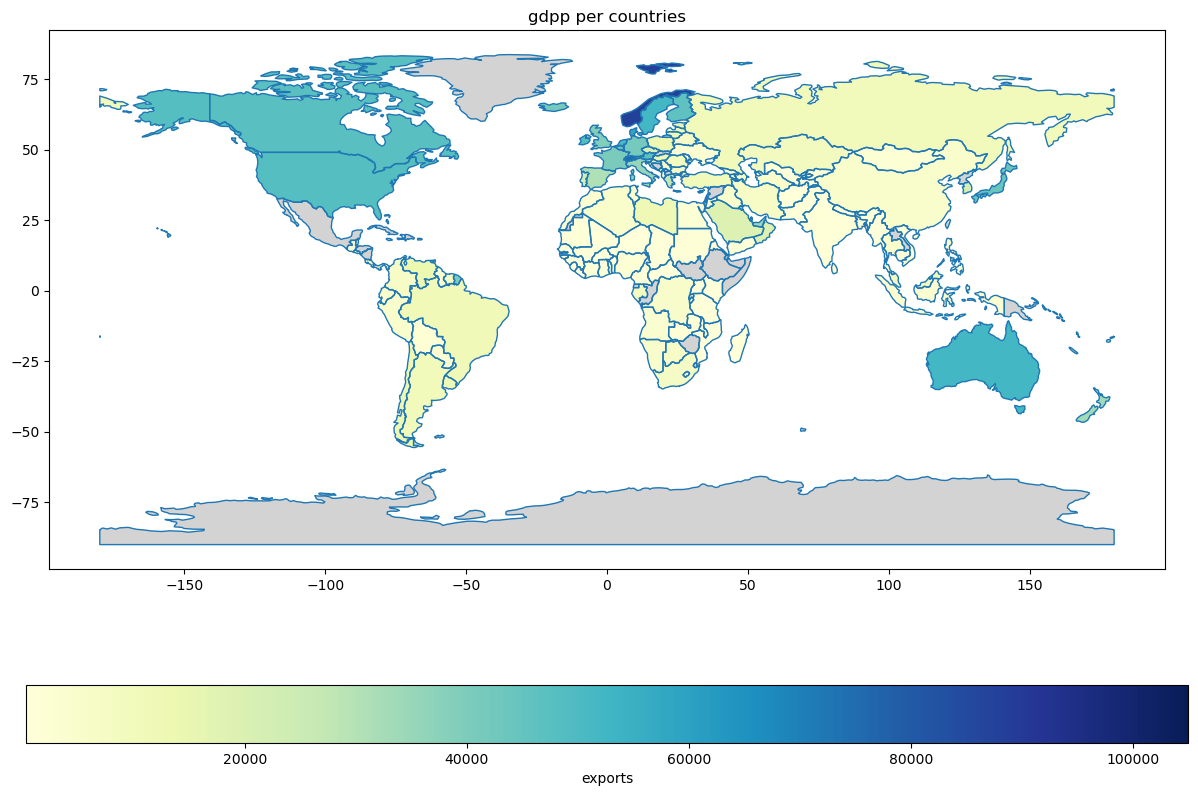

In [18]:
#Step3: Plotting World Map
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge dataframes on the country name
# Ensure country names in your df match with those in the world map dataset
merged = world.merge(df, how='left', left_on='name', right_on='country')

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='gdpp', ax=ax, legend=True,
            legend_kwds={'label': "exports",
                         'orientation': "horizontal"},
            cmap='YlGnBu', missing_kwds={"color": "lightgrey"})

# Set title and show plot
ax.set_title('gdpp per countries')
plt.show()


                                                        Machine Learning  


In [19]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
scaled_data = scaler.fit_transform(df2_dropped)# Step 1 : by this code we miss the names of columns
scaled_data=pd.DataFrame(scaled_data, columns =df2_dropped.columns)# Step2: we should convert scaled data to DataFrame and borrow the nemes of columns from df. 
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


                                                                PCA

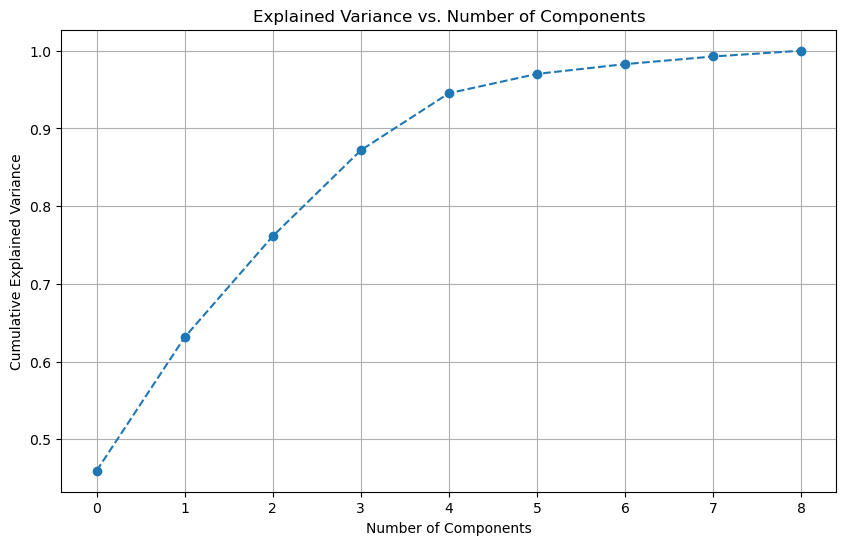

In [20]:
# Script1 for finding optimum n_components
#1. Fit PCA and Plot Explained Variance

from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_data)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [21]:
# Script1 for finding optimum n_components
#2. Choose Number of Components Based on Cumulative Variance Threshold

# Set a threshold for the cumulative explained variance
threshold = 0.95

# Find the number of components that explain at least `threshold` variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(n_components)

print(f'Number of components that explain at least {threshold*100}% variance: {n_components}')


6
Number of components that explain at least 95.0% variance: 6


In [22]:
#3. Apply PCA with the Optimal Number of Components

# Initialize PCA with the optimal number of components
pca = PCA(n_components=6) 

# Fit and transform the data
data_pca = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA-transformed data
pca_columns=['PCA1', 'PCA2', 'PCA3' , 'PCA4', 'PCA5', 'PCA6']
df_pca = pd.DataFrame(data = data_pca, columns=pca_columns)


# Print the new DataFrame with PCA components
print(df_pca.head())


       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310 -0.254597
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677  0.084579
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475 -0.401696
3 -2.932423  1.695555  1.525044  0.839625 -0.273209 -0.547996
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007 -0.206919


                                                 Clustering Algorithms
                                                      1. K_KMeans

So far, the 2 important DataFrames:
df_pca#for modelling 
scaled_data# for visualization of models

In [23]:
list=[]
kmeans_set={"init":"random", "n_init":10,"max_iter":300, "random_state":42}
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, **kmeans_set)#** open dictionary
    kmeans.fit(df_pca)
    list.append(kmeans.inertia_)# Optimum Model= intertia low and minimum clusters

In [24]:
from kneed import KneeLocator

# 
k1 = KneeLocator(range(2, 11), list, curve="convex", direction="decreasing")
elbow_point = k1.elbow
print("Elbow point:", elbow_point)

Elbow point: 4


In [25]:
### Evaluation internal
### Getting Lists of Scores according to Cluster_numbers

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_pca)
    S_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette.append(S_score)

calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_pca)
    C_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
    calinski_harabasz.append(C_score)

davies_bouldin = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_pca)
    D_score = davies_bouldin_score(scaled_data, kmeans.labels_)
    davies_bouldin.append(D_score)


print('silhouette: ', silhouette)
print('calinski_harabasz: ', calinski_harabasz)
print('davies_bouldin: ', davies_bouldin)


silhouette:  [0.28735668921406704, 0.28329575683463126, 0.29595170577528157, 0.22026412747638696, 0.2352375044068816, 0.20813364998505374, 0.21466388267983422, 0.2197014504370211, 0.21589244274296762]
calinski_harabasz:  [71.13746166773552, 66.23475806200629, 62.24140743438579, 55.86989684099682, 54.17915713919376, 50.94603431063834, 47.348481587512005, 47.83161465928058, 45.896769423873174]
davies_bouldin:  [1.3042586920733252, 1.2769056099698288, 1.052964198783274, 1.2396904924064371, 1.0786209200069028, 1.2201631521435492, 1.2031701725664998, 1.240949891965414, 1.2918981879070264]


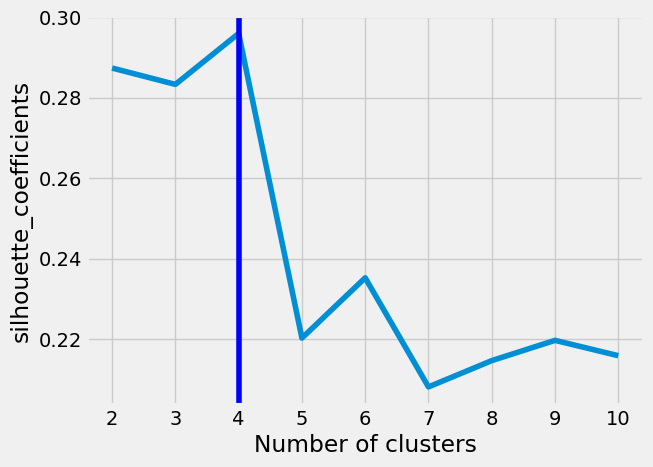

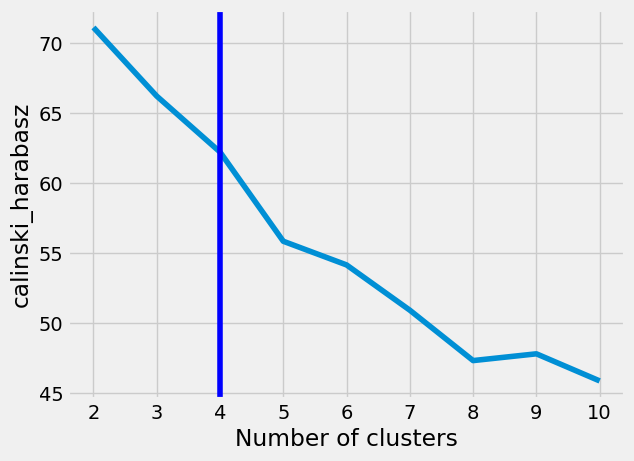

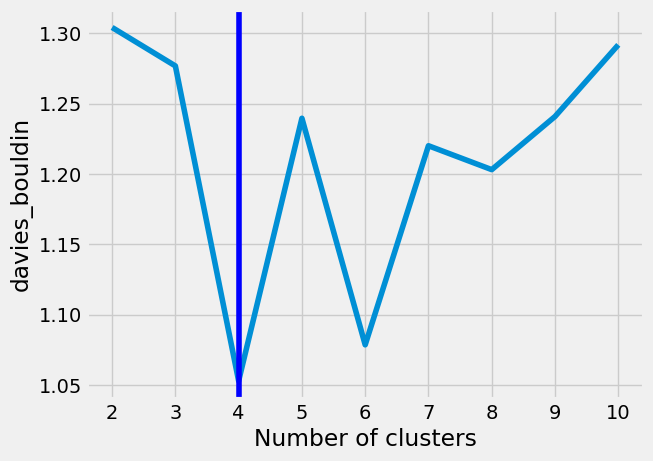

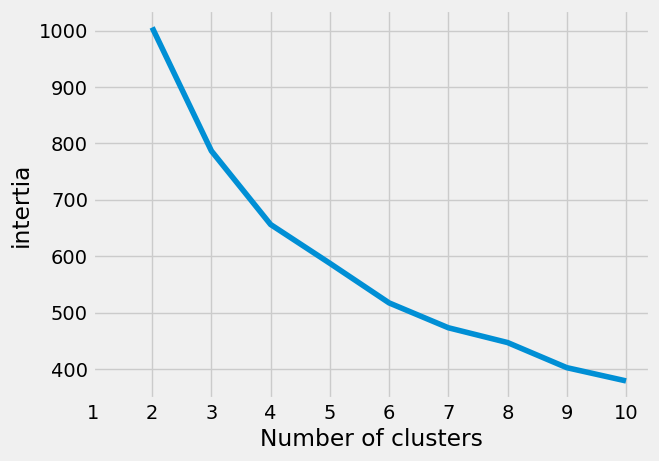

In [26]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("silhouette_coefficients")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()


plt.style.use('fivethirtyeight')
plt.plot(range(2,11), calinski_harabasz)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("calinski_harabasz")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("davies_bouldin")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")        
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), list)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("intertia")
plt.show()

number of clusters: inertia:3 silhouette:4 calinski harabasz score:2,3 davies bouldin score:2,3

In [27]:
#assign optimal cluster to kmeans algoritm
kmeans=KMeans(n_clusters=4).fit(df_pca)
centroids=kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print("Labels=", labels)

[[ 2.56872337 -0.8250807   0.05511883  0.9375869  -0.25346202 -0.0211618 ]
 [ 0.20153968 -0.11025869  0.01829394 -0.73433997  0.1545604   0.04810135]
 [-2.46837066  0.41027365 -0.08554783  0.69791763 -0.15119825 -0.06636082]
 [ 5.46022462  5.43247334  0.21164795  0.90605761  0.45522896 -0.15873469]]
Labels= [2 1 1 2 1 1 1 0 0 1 1 1 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 0 0 1 1 1 1 2 2 1 1 0 0 2 2 1 0 2 0 1 1 2 2 1 2 1 0 1 1 1 2 0
 0 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 3 1 2 2 1 1 2 3 2 1 1 1 1 1 1 2 1 2 1 0
 0 2 2 0 1 2 1 1 1 1 1 0 0 1 1 2 1 1 2 1 1 2 3 1 0 1 2 0 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]


In [28]:
labels_df=pd.DataFrame(labels)
labels_df

,0
0,2
1,1
2,1
3,2
4,1
...,...
162,1
163,1
164,1
165,2


In [29]:
# Concat a new column including labels for ploatting

labels_df['cluster'] = labels# defining a new dataframe to dedicate a column's name to the dataframe.
df_kmeans=pd.concat([scaled_data, labels_df], axis=1)
df_kmeans.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2,2
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,1


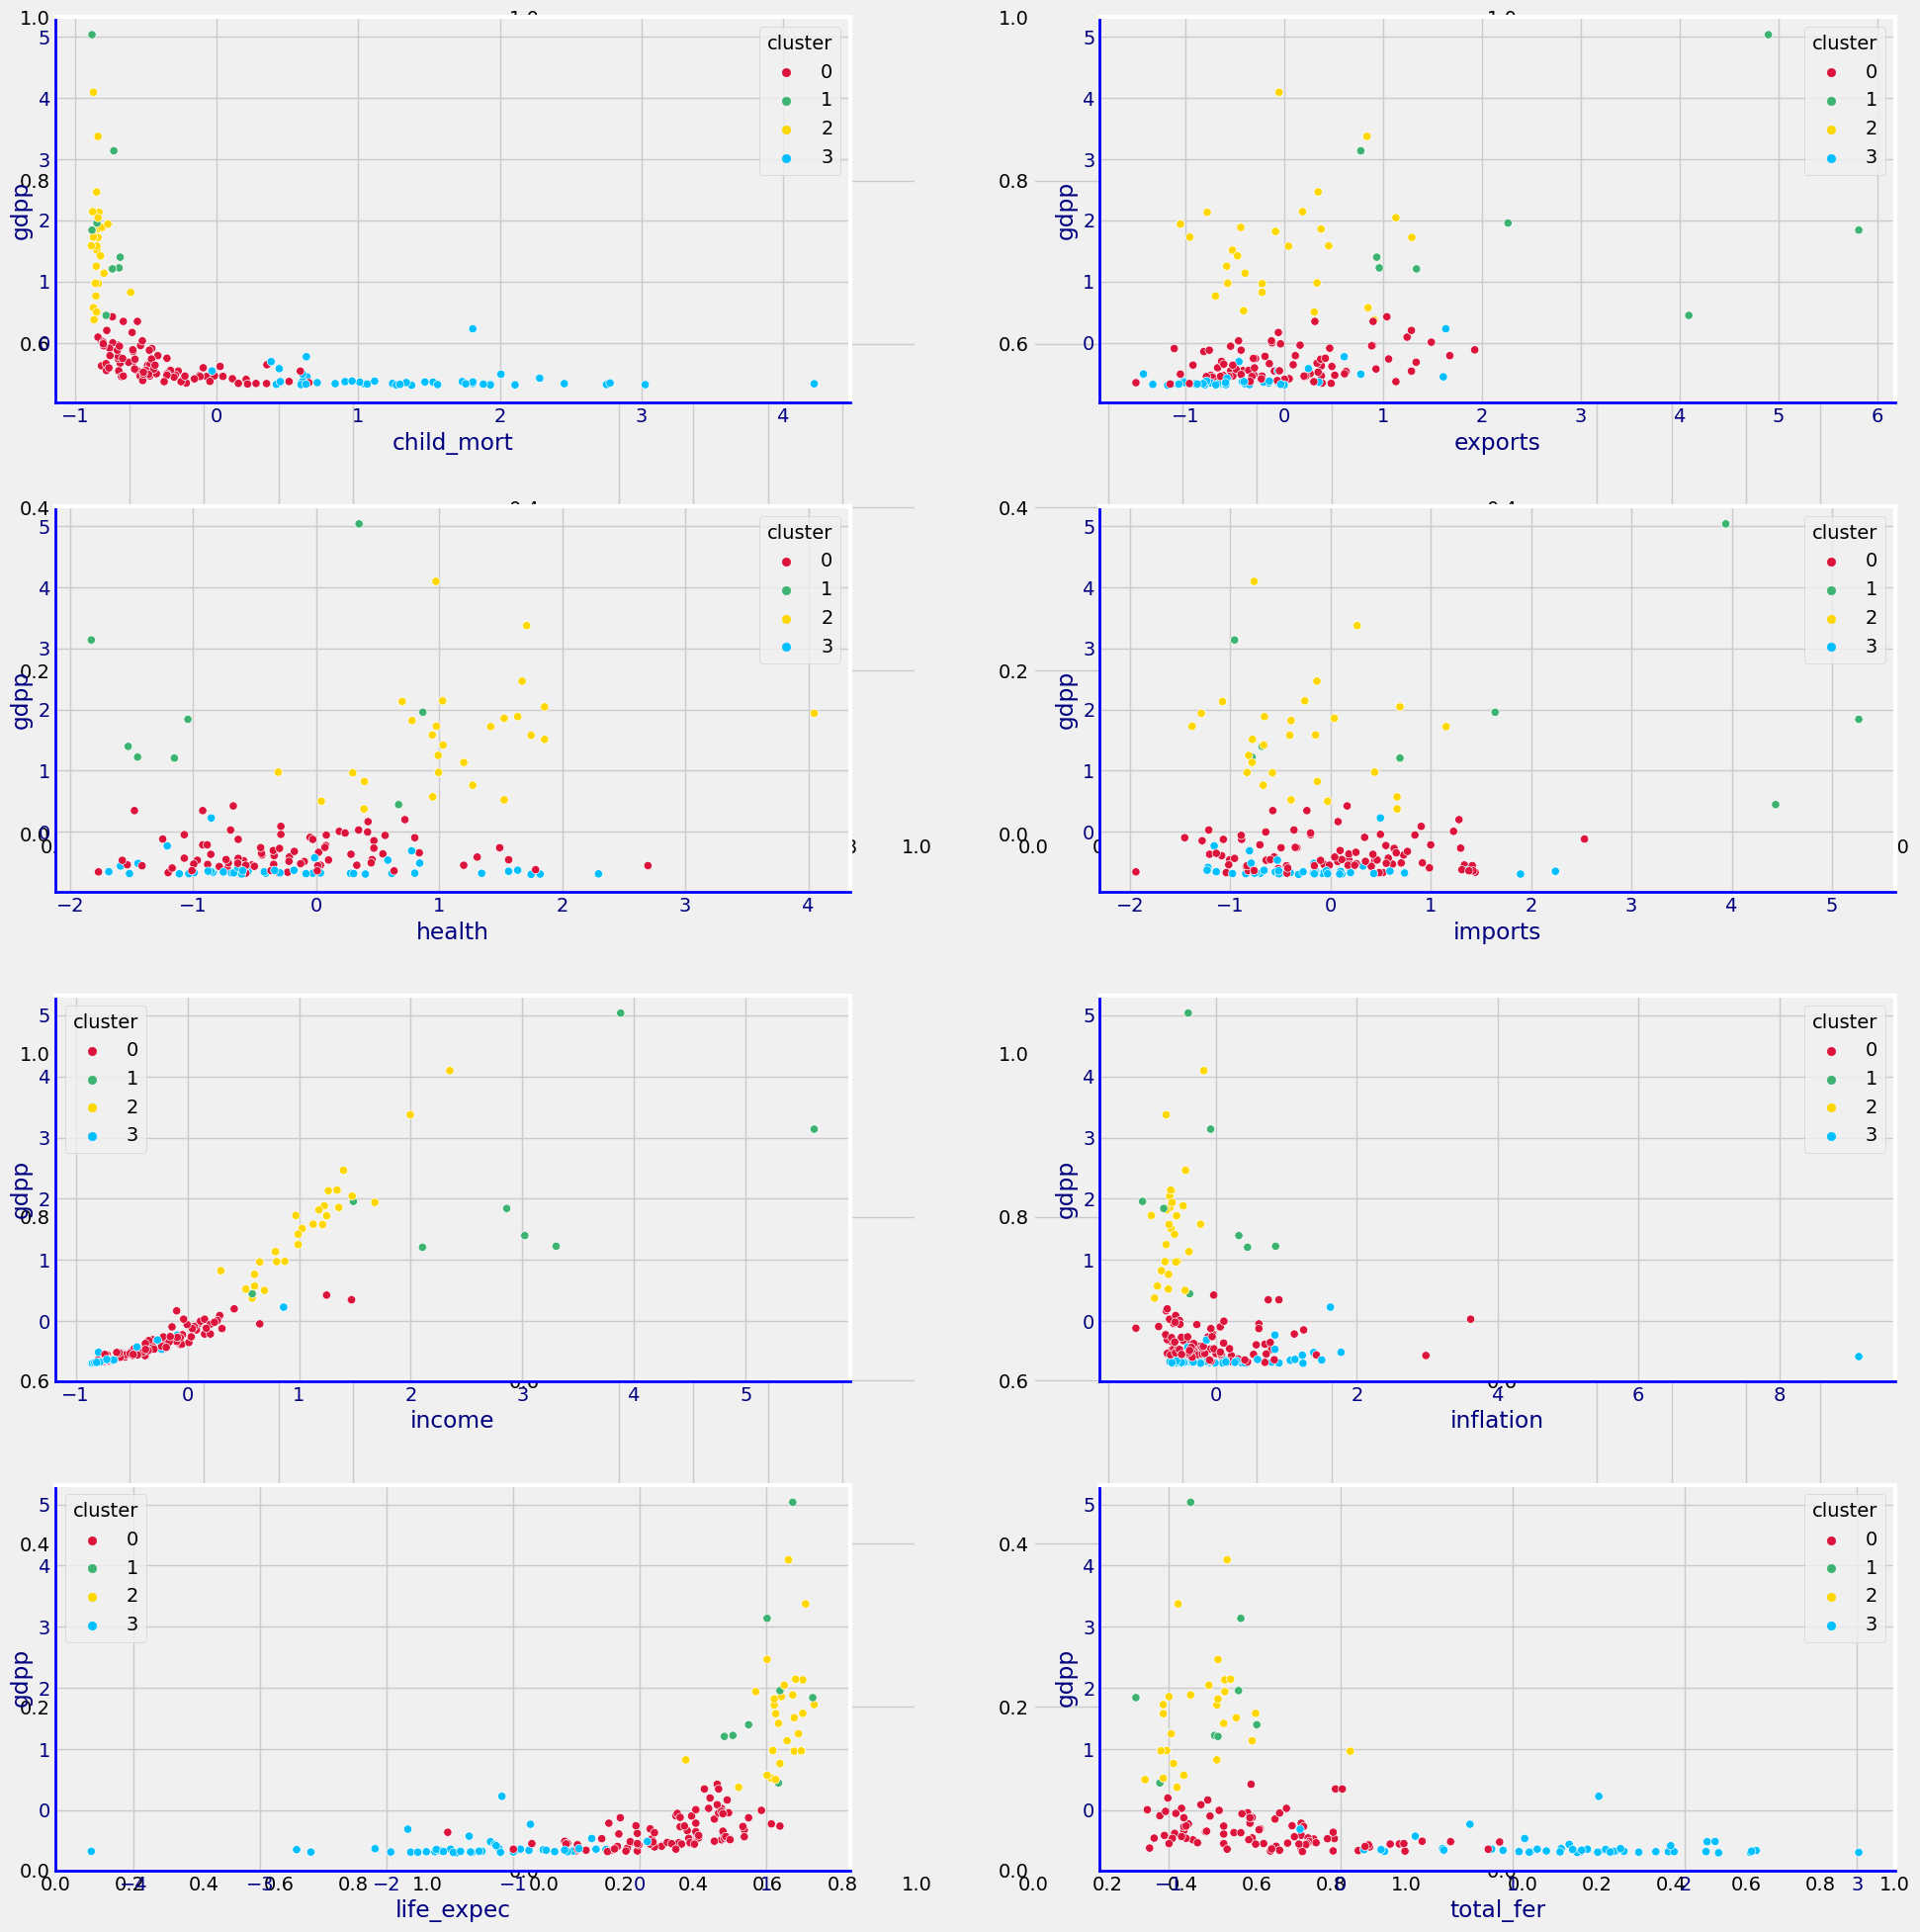

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_kmeans contains your data with a 'cluster' column and cluster_labels as defined
col_names = ['child_mort', 'exports', 'health', 'imports', 'income',
             'inflation', 'life_expec', 'total_fer']
cluster_labels = [0, 1, 2, 3]  # Adjust based on your actual cluster labels

# Define a palette with four distinct colors
palette1 = ["crimson", "MediumSeaGreen", "gold", "deepskyblue"]

# Assuming df_kmeans contains your data with a 'cluster' column
plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

j = 0
for i in col_names:
    plt.subplot(4, 2, j + 1)
    ax = sns.scatterplot(x=i, y='gdpp', hue='cluster', data=df_kmeans, palette=palette1)
    j += 1
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes

plt.tight_layout()
plt.show()


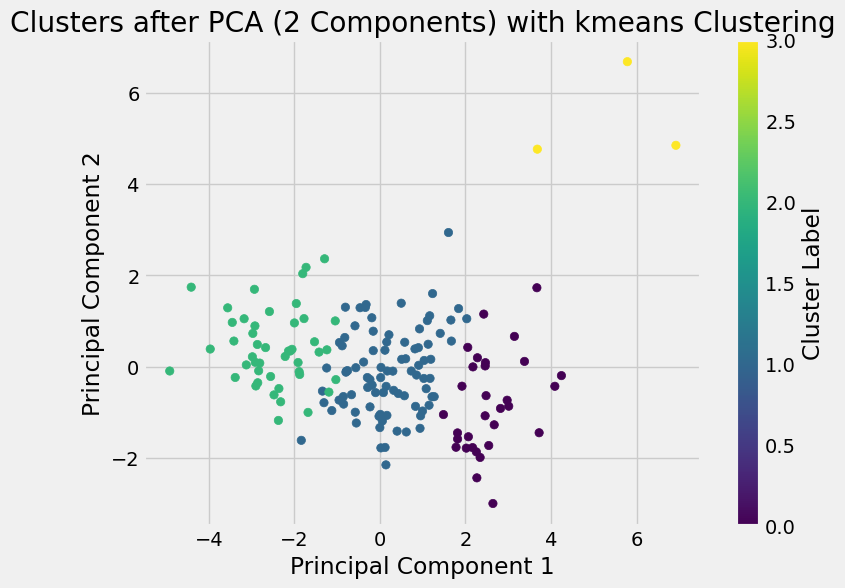

In [31]:
# Reduce dimensionality for visualization using PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'Clusters after PCA (2 Components) with kmeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

                                            2. Hierarchical Clustering 
                                          Type 1 Agglomerative Clustering

In [32]:
#grid search for Agglomerative Clustering(finding optimum n_clusters and linkage according to the silhouette_score)



# Define parameter ranges
param_grid = {
    'n_clusters': range(2, 10),
    'linkage': ['ward', 'complete', 'average', 'single']
}


# List to store results
Results = []

# Perform grid search
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(df_pca)
        score = silhouette_score(df_pca, labels)
        
        # Append results to the list
        Results.append({'silhouette_score': score, 'n_clusters': n_clusters, 'linkage': linkage})

# Convert results to DataFrame for better visualization
Results = pd.DataFrame(Results)

print(Results)
print(Results.nlargest(3, 'silhouette_score'))

    silhouette_score  n_clusters   linkage
0           0.319161           2      ward
1           0.636680           2  complete
2           0.636680           2   average
3           0.636680           2    single
4           0.288179           3      ward
5           0.569238           3  complete
6           0.522151           3   average
7           0.574291           3    single
8           0.299641           4      ward
9           0.307922           4  complete
10          0.477009           4   average
11          0.571743           4    single
12          0.304219           5      ward
13          0.285599           5  complete
14          0.373034           5   average
15          0.470926           5    single
16          0.318497           6      ward
17          0.278209           6  complete
18          0.299717           6   average
19          0.374397           6    single
20          0.235677           7      ward
21          0.224697           7  complete
22         

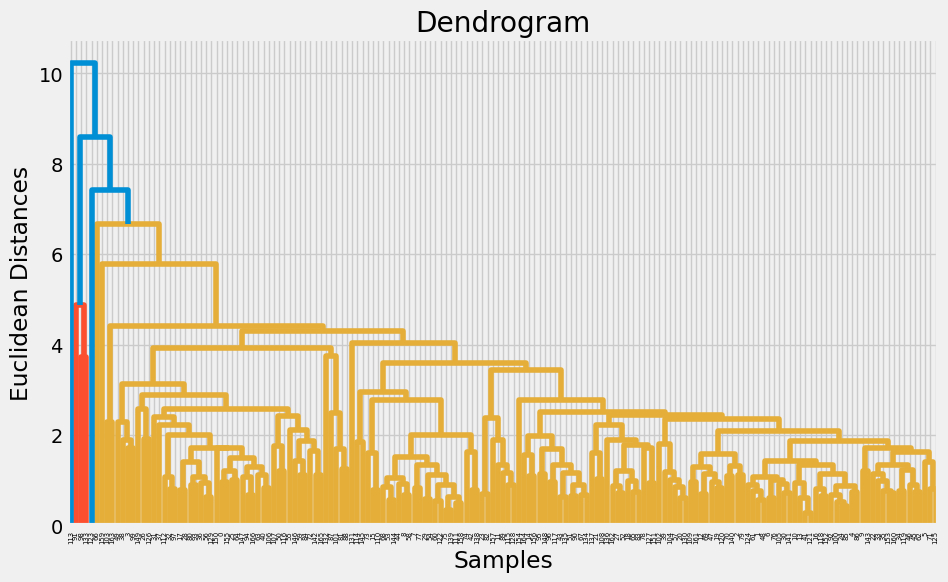

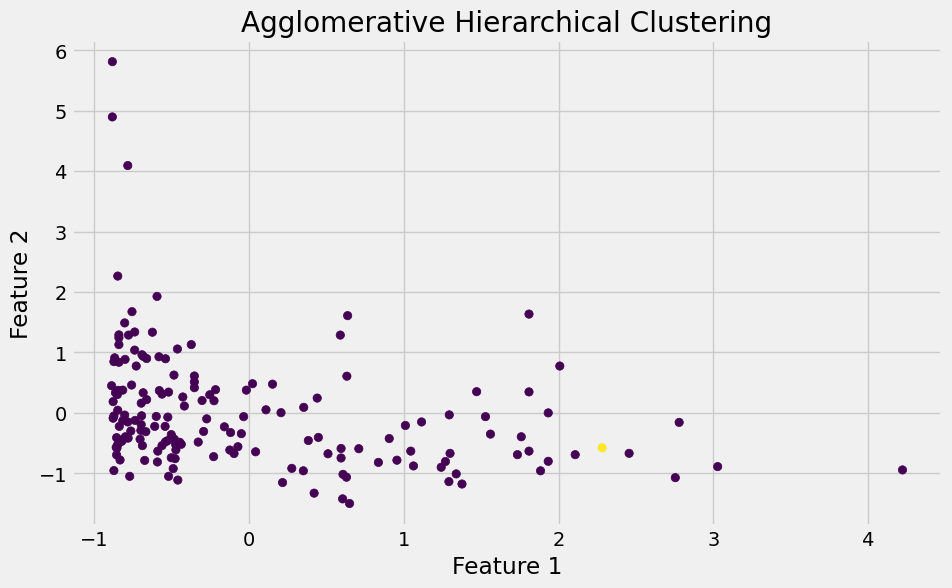

In [33]:

import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
linkage_method = 'average'
hc = AgglomerativeClustering(n_clusters=2, linkage=linkage_method)
cluster_labels = hc.fit_predict(scaled_data)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=linkage_method))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()

# Visualize clusters
plt.figure(figsize=(10, 6))
# If scaled_data is a DataFrame
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=cluster_labels, cmap='viridis')
# If scaled_data is a NumPy array, use the following line instead:
# plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


silhouette:  [0.6366804395139984, 0.5221509727524003, 0.47700867511021033, 0.37303399456485675, 0.29971694241477415, 0.2725000373402568, 0.25229929655750805, 0.27219007105855114, 0.2671516024035632]
calinski_harabasz:  [11.691339421140189, 18.96474828440657, 15.305737398412614, 13.211192227300373, 11.571137173851229, 25.47169895172011, 23.22580041815596, 34.58532419884135, 31.196898913624256]
davies_bouldin:  [0.2596794063203949, 0.6287682782763214, 0.5741270692559046, 0.5347526610308969, 0.5647308553439759, 0.6727391098694293, 0.6941493282784708, 0.7032622651938927, 0.6299661366871228]


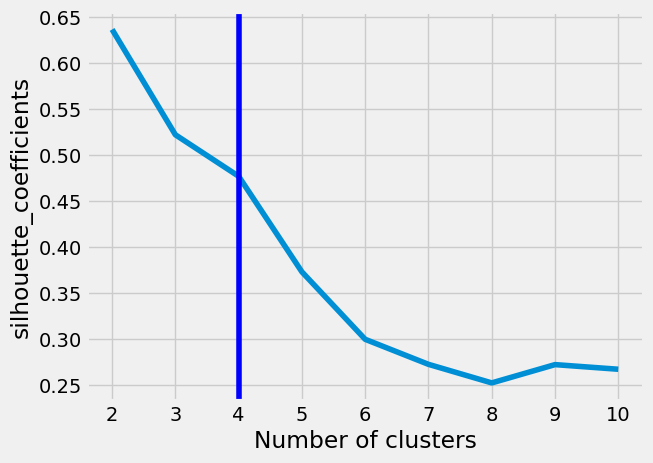

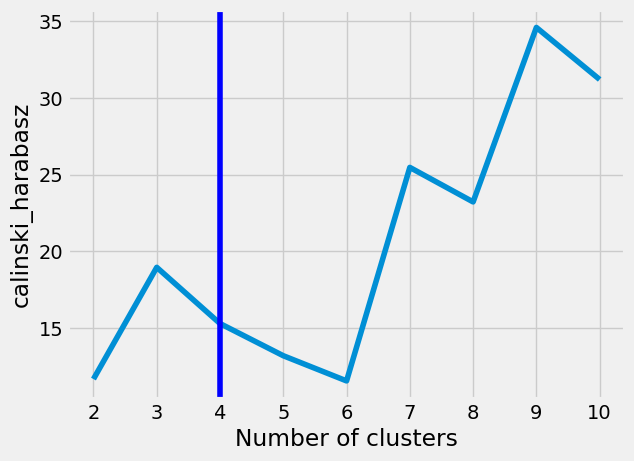

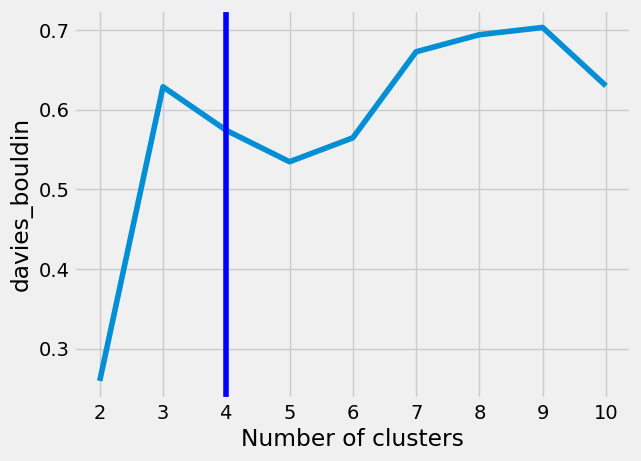

In [34]:
###  Evaluation & Plotting scores according to number of clusters
### Getting Lists of Scores according to Cluster_numbers

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='average')
    hc.fit(df_pca)
    S_score = silhouette_score(df_pca, hc.labels_)
    silhouette.append(S_score)
    
   

calinski_harabasz = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='average')
    hc.fit(df_pca)
    C_score = calinski_harabasz_score(df_pca, hc.labels_)
    calinski_harabasz.append(C_score)
    
  
davies_bouldin = []
for k in range(2,11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='average')
    hc.fit(df_pca)
    D_score = davies_bouldin_score(df_pca, hc.labels_)
    davies_bouldin.append(D_score)


print('silhouette: ', silhouette)
print('calinski_harabasz: ', calinski_harabasz)
print('davies_bouldin: ', davies_bouldin)

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("silhouette_coefficients")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()


plt.style.use('fivethirtyeight')
plt.plot(range(2,11), calinski_harabasz)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("calinski_harabasz")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")         
plt.show()

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel ("davies_bouldin")
plt.axvline(x=k1.elbow, color="b", label="axvline_full height")        
plt.show()

Evaluation Results of Agglomerative Clustering: silhouette:2 clusters calinski_harabasz: 3 clusters davies_bouldin 3clusters

So, we consider clusters:3

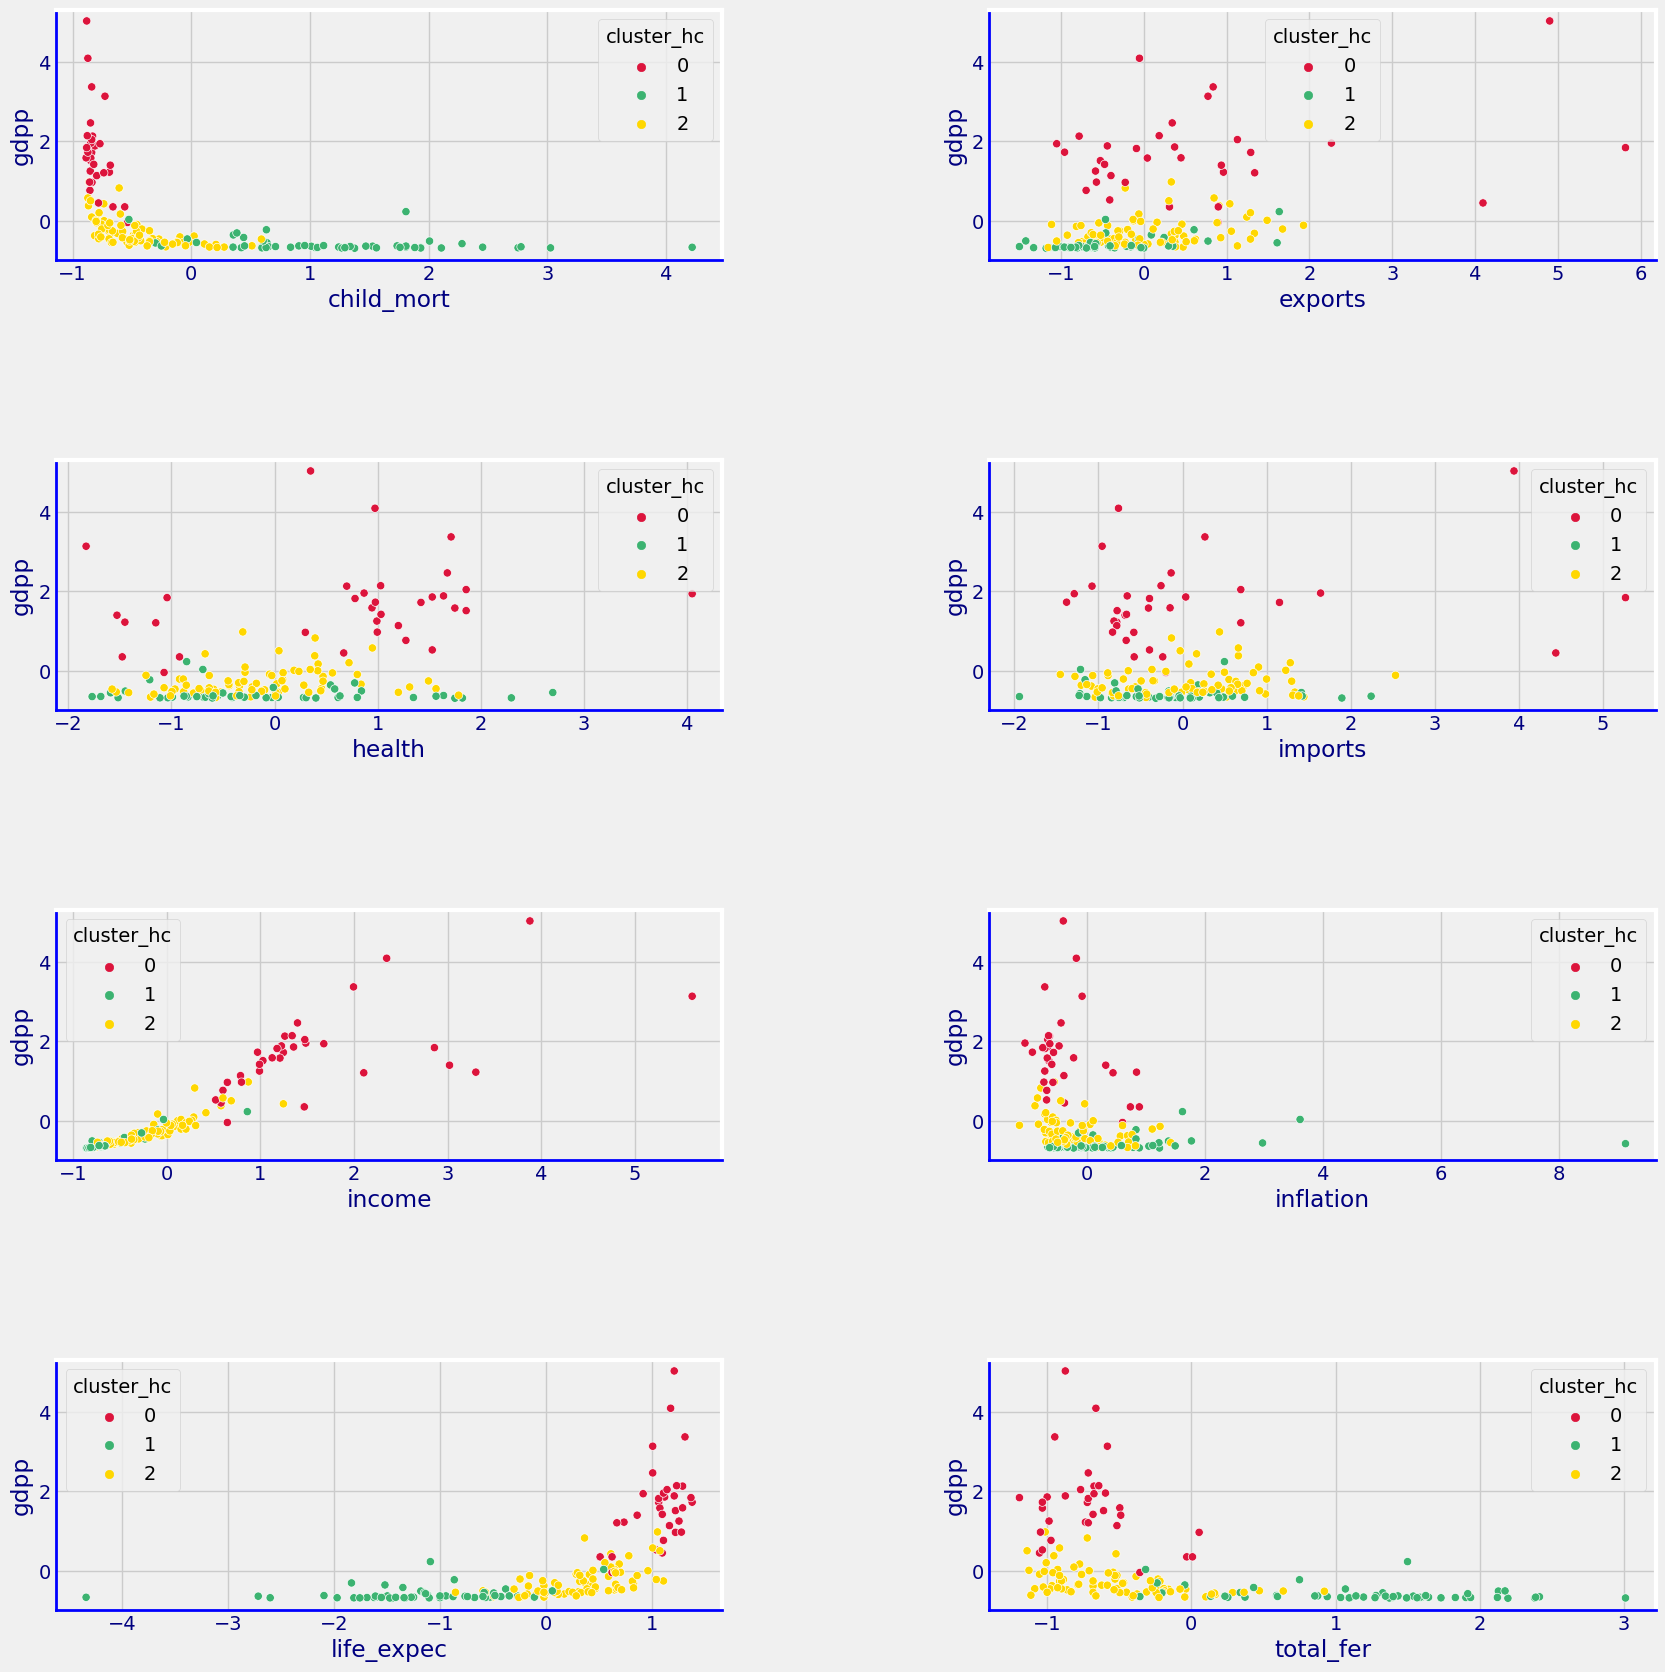

In [35]:
# Ploting dataset

#Step1: implementation the optimum parameters and labeling
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')# important note: the previous results shaowed that linkage of 'single' and 'awerage' have the best scores, they did not seperate well!
cluster_labels = hc.fit_predict(df_pca)
df_hc=pd.concat([pd.DataFrame(scaled_data), pd.DataFrame({'cluster_hc':cluster_labels})], axis=1)
unique_clusters = df_hc['cluster_hc'].unique()
unique_clusters
#step  2: subplot


plt.subplots(nrows=4 , ncols=2 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1=["crimson","MediumSeaGreen","gold"]
j=0 
for i in col_names:
     
    plt.subplot(4,2,j+1)
    ax = sns.scatterplot(x=i , y  ='gdpp', hue="cluster_hc", data=df_hc, palette=palette1)
    j=j+1
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes

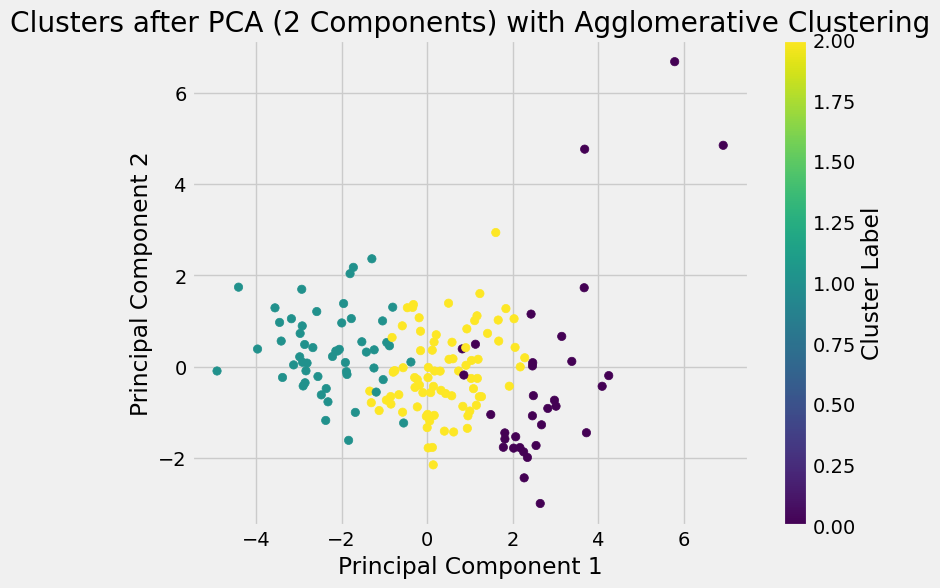

In [36]:
# Reduce dimensionality for visualization using PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f'Clusters after PCA (2 Components) with Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

                                                          3. DBSCAN
           Clustering algorithm that groups together points that are closely packed and separates regions of low density.

In [37]:
#grid search for DBSCAN


from sklearn.cluster import DBSCAN
import numpy as np

# Convert DataFrame to NumPy array
numpy_array = df_pca.values
Results = []


# Define a range of epsilon values
eps_values = np.linspace(1, 5, num=20)
min_samples_values = range(2, 11)
best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(df_pca)
        S_score =  silhouette_score(df_pca, labels)
        C_score = calinski_harabasz_score(df_pca, dbscan.labels_)
        D_score = davies_bouldin_score(df_pca, dbscan.labels_)
       
        # Append results to the list
        Results.append({'silhouette_score': S_score, 'calinski_harabasz_score': C_score,'davies_bouldin_score':D_score,
                        'eps': eps, 'min_samples': min_samples})










In [38]:
Results_df = pd.DataFrame(Results)
print(Results_df.dtypes)
# Convert col3 from string to float, handling errors by setting invalid parsing as NaN
Results_df['silhouette_score'] = pd.to_numeric(Results_df['silhouette_score'], errors='coerce')
print(Results_df.dtypes)

silhouette_score           float64
calinski_harabasz_score    float64
davies_bouldin_score       float64
eps                        float64
min_samples                  int64
dtype: object
silhouette_score           float64
calinski_harabasz_score    float64
davies_bouldin_score       float64
eps                        float64
min_samples                  int64
dtype: object


In [39]:
Results_df

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,eps,min_samples
0,-0.040080,10.458202,1.758453,1.0,2
1,0.097647,16.374389,2.194265,1.0,3
2,0.131172,20.956532,2.251702,1.0,4
3,0.021152,14.481269,2.078713,1.0,5
4,0.012122,13.640837,2.031504,1.0,6
...,...,...,...,...,...
175,0.622306,8.024681,1.705289,5.0,6
176,0.622306,8.024681,1.705289,5.0,7
177,0.622306,8.024681,1.705289,5.0,8
178,0.622306,8.024681,1.705289,5.0,9


In [40]:
# Find the top 3 results based on silhouette score
print(Results_df.nlargest(3, 'silhouette_score'))

     silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
126           0.63668                11.691339              0.259679   
127           0.63668                11.691339              0.259679   
135           0.63668                11.691339              0.259679   

          eps  min_samples  
126  3.947368            2  
127  3.947368            3  
135  4.157895            2  


In [41]:
# Convert DataFrame to NumPy array
numpy_array = df_pca.values
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.947368, min_samples=2)
labels = dbscan.fit_predict(numpy_array)
df_dbscan=pd.concat([pd.DataFrame(scaled_data), pd.DataFrame({'cluster_dbscan':labels})], axis=1)
numpy_array=df_dbscan.values
df_dbscan['cluster_dbscan'].unique()
#Cluster labels (0, 1, 2, ...): Positive integer values represent different clusters.
#Noise points (-1): Negative values, specifically -1, represent points that are considered noise, meaning they do not fit into any cluster based on the eps and min_samples parameters.

array([ 0, -1], dtype=int64)

                                                           4. MeanShift

In [42]:
# Define the parameter grid to search
param_grid = {
    'bandwidth': range(2,20),  # Adjust bandwidth values
                # Seed initialization strategy
}

results = []

# Perform grid search manually
for bandwidth in param_grid['bandwidth']:
    bandwidth=bandwidth/3
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(df_pca)
    labels = ms.labels_
    #select the right start point of 'bandwidth' how the numbers of clusters do not exceed the number of clusters
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points if any
    print(f'bandwidth: {bandwidth}, Number of clusters: {num_clusters}')  
# SO, we concider 'bandwidth' start point from 0.4

bandwidth: 0.6666666666666666, Number of clusters: 114
bandwidth: 1.0, Number of clusters: 64
bandwidth: 1.3333333333333333, Number of clusters: 32
bandwidth: 1.6666666666666667, Number of clusters: 22
bandwidth: 2.0, Number of clusters: 13
bandwidth: 2.3333333333333335, Number of clusters: 8
bandwidth: 2.6666666666666665, Number of clusters: 7
bandwidth: 3.0, Number of clusters: 7
bandwidth: 3.3333333333333335, Number of clusters: 5
bandwidth: 3.6666666666666665, Number of clusters: 4
bandwidth: 4.0, Number of clusters: 3
bandwidth: 4.333333333333333, Number of clusters: 3
bandwidth: 4.666666666666667, Number of clusters: 2
bandwidth: 5.0, Number of clusters: 2
bandwidth: 5.333333333333333, Number of clusters: 2
bandwidth: 5.666666666666667, Number of clusters: 2
bandwidth: 6.0, Number of clusters: 2
bandwidth: 6.333333333333333, Number of clusters: 2


In [43]:

# Define the parameter grid to search
param_grid = {
    'bandwidth': range(2,7),  # Adjust bandwidth values
                
}
results = []
bandwidth= range(7,18)
# Perform grid search manually
for bandwidth in param_grid['bandwidth']:
    bandwidth=bandwidth/3
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(df_pca)
    labels = ms.labels_
    S_score = silhouette_score(df_pca, labels)
    C_score = calinski_harabasz_score(df_pca, labels)
    D_score = davies_bouldin_score(df_pca, labels)
       
# Append results to the list
    results.append({'silhouette_score': S_score, 'calinski_harabasz_score': C_score,'davies_bouldin_score':D_score,
                'bandwidth': bandwidth })

# Convert results to DataFrame for better visualization
results_df2 = pd.DataFrame(results)

# Print the top 3 results
print(results_df2.nlargest(3, 'silhouette_score'))

   silhouette_score  calinski_harabasz_score  davies_bouldin_score  bandwidth
4          0.199053                28.540450              0.690327   2.000000
3          0.184064                27.324032              0.677665   1.666667
1          0.159953                35.156822              0.564427   1.000000


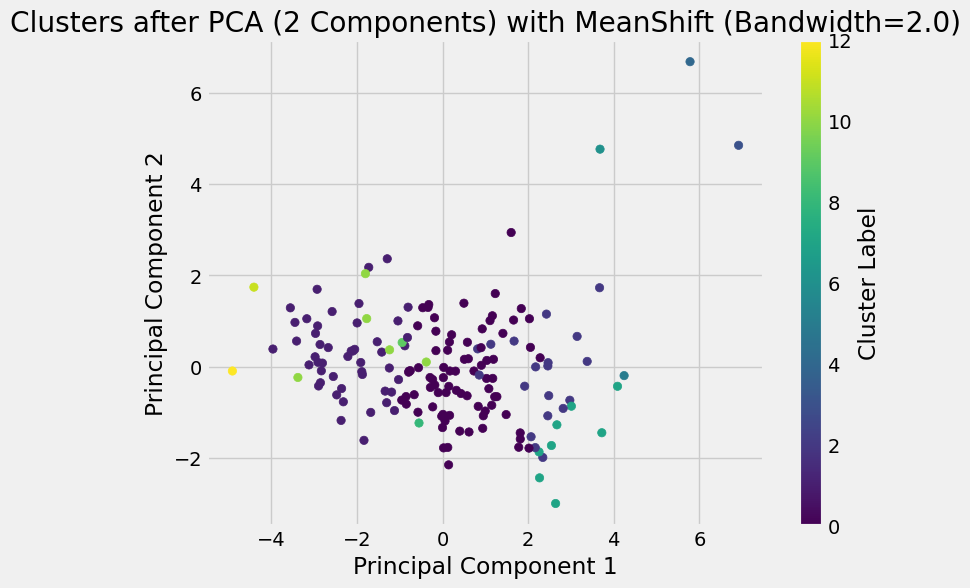

In [44]:
# Select the bandwidth with the highest silhouette score
best_bandwidth = 2.0

# Perform MeanShift clustering with the selected bandwidth
best_ms = MeanShift(bandwidth=best_bandwidth)
best_labels = best_ms.fit_predict(df_pca)

# Reduce dimensionality for visualization using PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.title(f'Clusters after PCA (2 Components) with MeanShift (Bandwidth={best_bandwidth})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

                                                         5.MiniBatchKMeans

Top 3 results based on Silhouette Score:
   n_clusters  silhouette_score  calinski_harabasz_score  davies_bouldin_score
1           3          0.282126                61.792127              1.262991
0           2          0.276056                70.678659              1.333006
2           4          0.257807                53.083485              1.184831


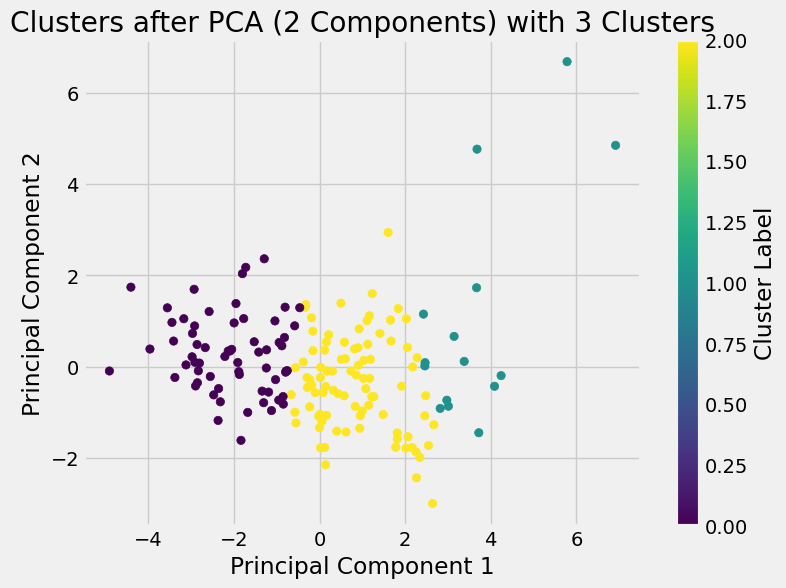

In [45]:




# Define the range of clusters to evaluate
cluster_range = range(2, 10)  # Example range from 2 to 9 clusters

# List to store the results
results = []

# Perform clustering for each number of clusters and calculate evaluation metrics
for n_clusters in cluster_range:
    mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=100)
    labels = mbkmeans.fit_predict(df_pca)
    
    S_score = silhouette_score(df_pca, labels)
    C_score = calinski_harabasz_score(df_pca, labels)
    D_score = davies_bouldin_score(df_pca, labels)
       
    # Append results to the list
    results.append({'n_clusters': n_clusters, 'silhouette_score': S_score, 
                    'calinski_harabasz_score': C_score, 'davies_bouldin_score': D_score})

# Step 4: Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the top 3 results based on silhouette score
print("Top 3 results based on Silhouette Score:")
print(results_df.nlargest(3, 'silhouette_score'))

# Step 5: Visualize the clusters using PCA for dimensionality reduction to 2 components
# Further reduce dimensionality for visualization purposes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df_pca)

# Assuming the best number of clusters is the one with the highest silhouette score
best_n_clusters = results_df.nlargest(1, 'silhouette_score')['n_clusters'].values[0]
best_mbkmeans = MiniBatchKMeans(n_clusters=best_n_clusters, random_state=42, batch_size=100)
best_labels = best_mbkmeans.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.title(f'Clusters after PCA (2 Components) with {best_n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


                                                  6. Birch       

In [46]:
# ensuring that the number of samples >> the number of clusters

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]  # Example threshold values
for threshold in thresholds:
    birch = Birch(threshold=threshold, n_clusters=None)
    birch.fit(df_pca)
    labels = birch.labels_
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points if any
    print(f'Threshold: {threshold}, Number of clusters: {num_clusters}')

Threshold: 0.1, Number of clusters: 167
Threshold: 0.2, Number of clusters: 164
Threshold: 0.3, Number of clusters: 145
Threshold: 0.4, Number of clusters: 121
Threshold: 0.5, Number of clusters: 104


Top 3 results based on Silhouette Score:
   threshold  silhouette_score  calinski_harabasz_score  davies_bouldin_score
5   0.688889          0.178989                45.559038              0.618666
8   0.922222          0.166958                37.718026              0.724886
6   0.766667          0.166663                40.899561              0.680742


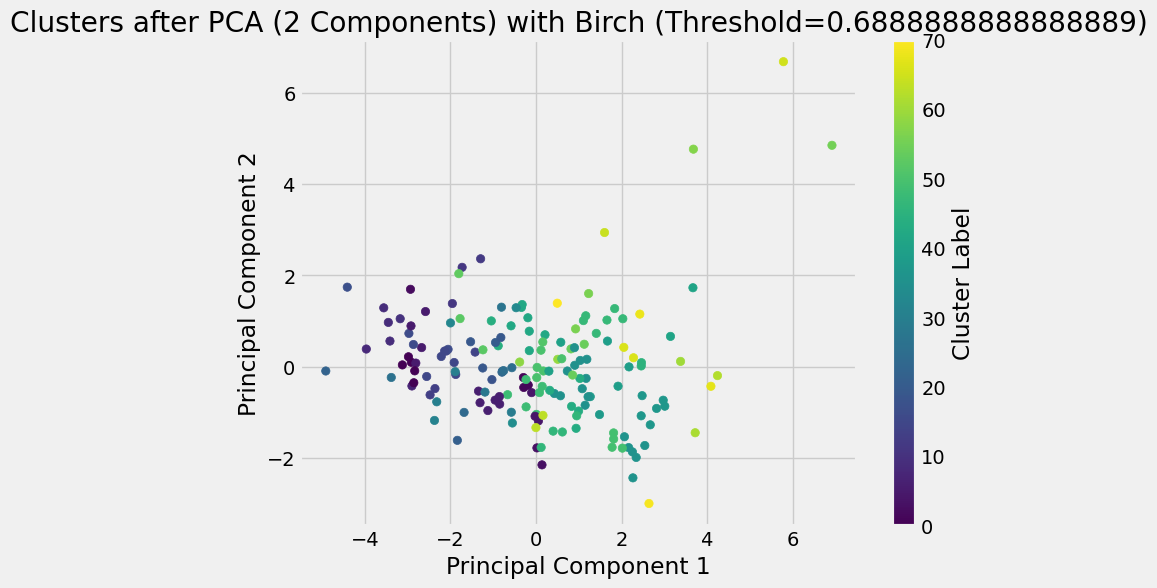

In [47]:

#review all steps
# Step 1: Load and standardize the data

# Step 2: Apply PCA to reduce dimensionality
#pca = PCA(n_components=6)  

# Step 3: Define a list to store the results
results = []

# Perform Birch clustering with different threshold values
for threshold in np.linspace(0.3, 1.0, 10):# the start poin is considered according to number of clusters
    birch = Birch(threshold=threshold, n_clusters=None)
    labels = birch.fit_predict(df_pca)
    S_score = silhouette_score(df_pca, labels)
    C_score = calinski_harabasz_score(df_pca, labels)
    D_score = davies_bouldin_score(df_pca, labels)
 
    # Append results to the list
    results.append({'threshold': threshold, 'silhouette_score': S_score, 
                    'calinski_harabasz_score': C_score, 'davies_bouldin_score': D_score})

# Step 4: Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the top 3 results based on silhouette score
print("Top 3 results based on Silhouette Score:")
print(results_df.nlargest(3, 'silhouette_score'))

# Step 5: Visualize the clusters using PCA for dimensionality reduction to 2 components
# Further reduce dimensionality for visualization purposes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df_pca)

# Assuming the best threshold is the one with the highest silhouette score
best_threshold = results_df.nlargest(1, 'silhouette_score')['threshold'].values[0]
best_birch = Birch(threshold=best_threshold, n_clusters=None)
best_labels = best_birch.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.title(f'Clusters after PCA (2 Components) with Birch (Threshold={best_threshold})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


                                                              7.GMM

Top 3 results based on Silhouette Score:
    n_components covariance_type  silhouette_score  calinski_harabasz_score  \
9              4            tied          0.320030                64.553155   
5              3            tied          0.311613                67.047438   
11             4       spherical          0.311177                64.711562   

    davies_bouldin_score  
9               0.994629  
5               1.192047  
11              1.023088  


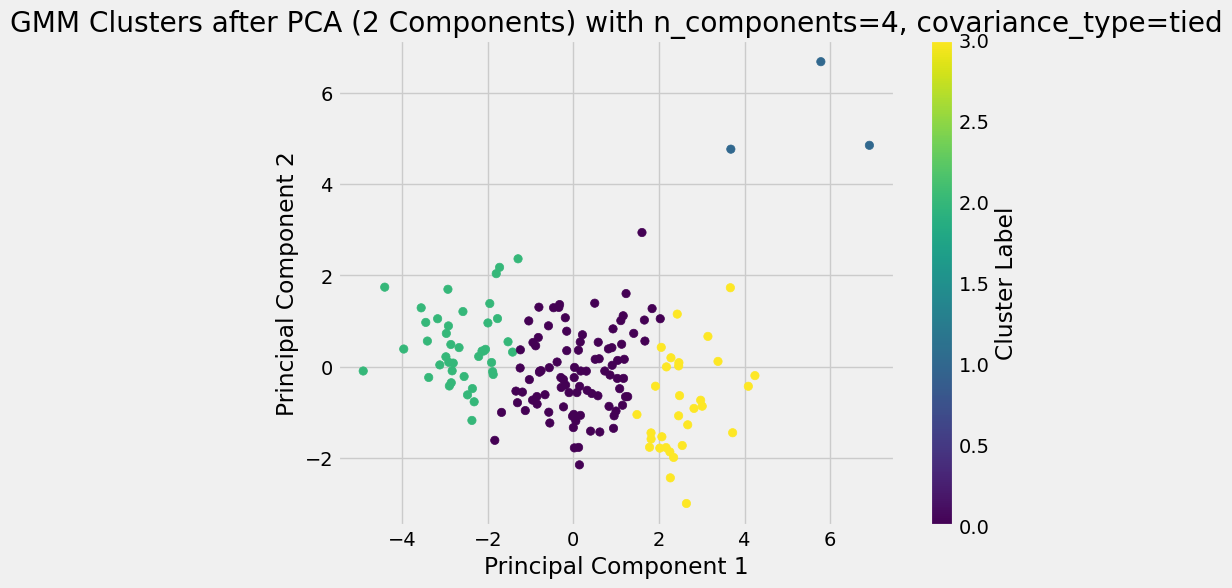

In [48]:

results = []


# Step 3: Define the parameter grid
param_grid = {
    'n_components': range(2, 11),  # Number of clusters
    'covariance_type': ['full', 'tied', 'diag', 'spherical']  # Covariance type
}

# List to store results
results = []

# Manually search through the parameter grid
for n_components in param_grid['n_components']:
    for covariance_type in param_grid['covariance_type']:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        labels = gmm.fit_predict(df_pca)
        
        S_score = silhouette_score(df_pca, labels)
        C_score = calinski_harabasz_score(df_pca, labels)
        D_score = davies_bouldin_score(df_pca, labels)
        
        # Append results to the list
        results.append({
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': S_score, 
            'calinski_harabasz_score': C_score, 
            'davies_bouldin_score': D_score
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the top 3 results based on silhouette score
print("Top 3 results based on Silhouette Score:")
print(results_df.nlargest(3, 'silhouette_score'))

# Step 4: Visualize the clusters using the best model
best_result = results_df.nlargest(1, 'silhouette_score').iloc[0]
best_gmm = GaussianMixture(n_components=best_result['n_components'], covariance_type=best_result['covariance_type'], random_state=42)
best_labels = best_gmm.fit_predict(X_pca_2d)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=best_labels, cmap='viridis', marker='o')
plt.title(f'GMM Clusters after PCA (2 Components) with n_components={best_result["n_components"]}, covariance_type={best_result["covariance_type"]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

                                                               Concluion

In [49]:
Models = {
    'Algorithms': ["K_KMeans", 'Agglomerative Clustering', 'DBSCAN', 'MeanShift', 'MiniBatchKMeans', 'Birch', 'GMM'],
    'silhouette_Score': [0.295, 0.63668, 0.63668, 0.199053, 0.282126, 0.178989, 0.320030],
    'calinski_harabasz':[71.13746166773552,34.585,11.691339,   28.540450,  61.792127, 45.559038,   64.553155  ],
    'davies_bouldin':[71.13746166773552, 0.7032,   0.259679, 0.690327,1.26299, 0.618666, 0.994629  ]
}

# Convert the dictionary to a DataFrame for better visualization
models_df = pd.DataFrame(Models)

# Print the DataFrame
print(models_df)


                 Algorithms  silhouette_Score  calinski_harabasz  \
0                  K_KMeans          0.295000          71.137462   
1  Agglomerative Clustering          0.636680          34.585000   
2                    DBSCAN          0.636680          11.691339   
3                 MeanShift          0.199053          28.540450   
4           MiniBatchKMeans          0.282126          61.792127   
5                     Birch          0.178989          45.559038   
6                       GMM          0.320030          64.553155   

   davies_bouldin  
0       71.137462  
1        0.703200  
2        0.259679  
3        0.690327  
4        1.262990  
5        0.618666  
6        0.994629  


So, K_KMeans,   GMM will be selected as the best Models.

In [ ]:
## Accessing names of the countries wich need financial help through k_means 

In [51]:

#assigning names of countries
# Concatenate df_kmeans with df['country']
df_kmeans_all = pd.concat([df_kmeans, df['country']], axis=1)

df_kmeans_all


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,cluster,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2,2,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,1,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,1,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2,2,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,1,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1,1,Vanuatu
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1,1,Venezuela
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1,1,Vietnam
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,2,2,Yemen


In [63]:
# Filter for countries that need financial aid (cluster_k_means == 3) through k_means 
#Note: According to the plots of k_means clusters, cluster=3 has the most child_mort, the least life expectation, and so on.
df_k_means_needed_countries = df_kmeans_all[df_kmeans_all['cluster'] == 3][['country']]
print(df_k_means_needed_countries)

                  country
0             Afghanistan
3                  Angola
17                  Benin
25           Burkina Faso
26                Burundi
28               Cameroon
31   Central African Rep.
32                   Chad
36                Comoros
37       Congo, Dem. Rep.
38            Congo, Rep.
40          Côte d'Ivoire
49      Equatorial Guinea
50                Eritrea
55                  Gabon
56                 Gambia
59                  Ghana
63                 Guinea
64          Guinea-Bissau
66                  Haiti
72                   Iraq
80                  Kenya
81               Kiribati
84                    Lao
87                Lesotho
88                Liberia
93             Madagascar
94                 Malawi
97                   Mali
99             Mauritania
106            Mozambique
108               Namibia
112                 Niger
113               Nigeria
116              Pakistan
126                Rwanda
129               Senegal
132         

In [ ]:
# Filter for countries that need financial aid (cluster_dbscan == 0) through GMM


In [60]:


best_gmm = GaussianMixture(n_components=best_result['n_components'], covariance_type=best_result['covariance_type'], random_state=42)
best_labels = best_gmm.fit_predict(X_pca_2d)
labels_df['cluster'] = best_labels# defining a new dataframe to dedicate a column's name to the dataframe.
df_gmm=pd.concat([df, labels_df], axis=1)
df_gmm.head()
df_gmm_needed_countries = df_gmm[df_gmm['cluster'] == 0][['country']]

print(df_gmm_needed_countries)

                 country
1                Albania
2                Algeria
4    Antigua and Barbuda
5              Argentina
6                Armenia
..                   ...
160              Uruguay
161           Uzbekistan
162              Vanuatu
163            Venezuela
164              Vietnam

[92 rows x 1 columns]
